In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [31]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Counting target values (yes)

In [33]:
df['y'].value_counts()


y
no     36548
yes     4640
Name: count, dtype: int64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

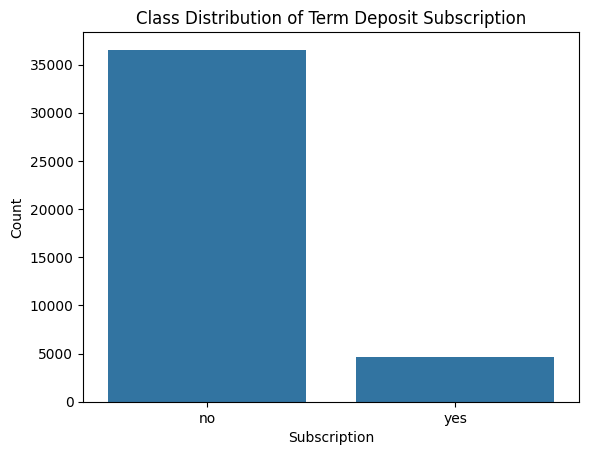

In [35]:
sns.countplot(x='y', data=df)
plt.title('Class Distribution of Term Deposit Subscription')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

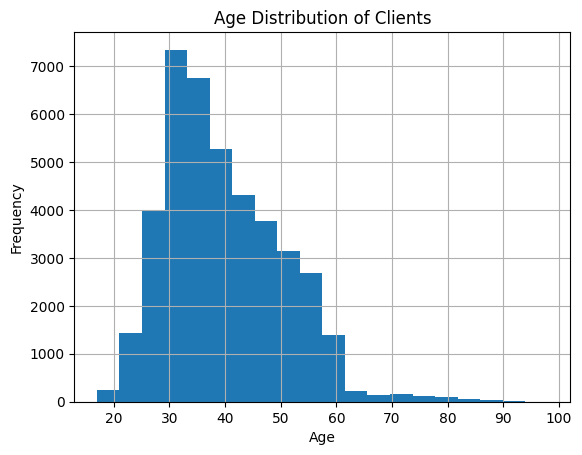

In [36]:
df['age'].hist(bins=20)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

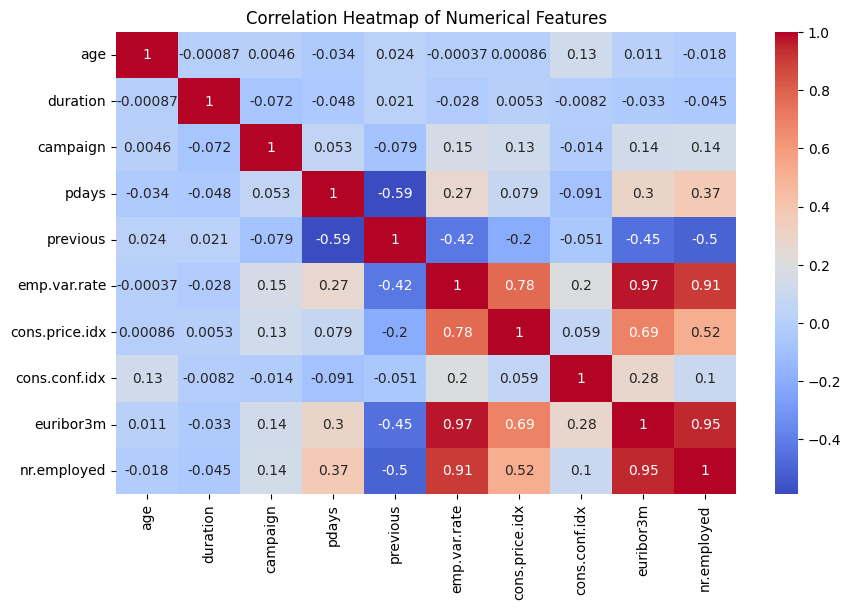

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

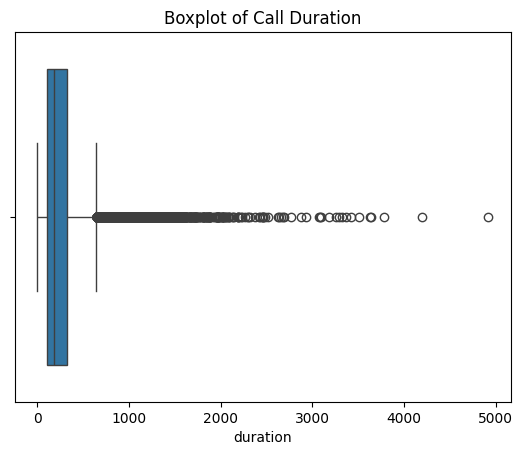

In [38]:
sns.boxplot(x=df['duration'])
plt.title('Boxplot of Call Duration')
plt.show()


# TRAIN TEST SPLIT

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
print(df['y'].dtype)
print(df['y'].isnull().sum())

object
0


In [41]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [42]:
X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [44]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
svm = SVC(probability=True, random_state=42) 
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [47]:
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [54]:
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test_scaled)
logreg_pred = logreg.predict(X_test_scaled)

In [56]:
rf_proba = rf.predict_proba(X_test)[:,1]
svm_proba = svm.predict_proba(X_test_scaled)[:,1]
logreg_proba = logreg.predict_proba(X_test_scaled)[:,1]

# Random Customer Prediction

In [126]:
#Randomizes customer data from the dataframe 
idx = np.random.randint(0, len(X_test))
sample_customer_2 = X_test.iloc[[idx]]
sample_customer_2_scaled = scaler.transform(sample_customer_2)

print("Customer index:", idx)
print("Random Forest prediction:", rf.predict(sample_customer_2)[0])
print("SVM prediction:", svm.predict(sample_customer_2_scaled)[0])
print("Logistic Regression prediction:", logreg.predict(sample_customer_2_scaled)[0])


Customer index: 2989
Random Forest prediction: 1
SVM prediction: 1
Logistic Regression prediction: 1


# METRICS

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [114]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:,1]
    else:
        y_prob = model.decision_function(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1-Score": f1_score(y, y_pred),
        "ROC-AUC": roc_auc_score(y, y_prob)
    }

In [115]:
rf_results = evaluate(rf, X_test, y_test)
svm_results = evaluate(svm, X_test_scaled, y_test)
logreg_results = evaluate(logreg, X_test_scaled, y_test)

In [116]:
results = pd.DataFrame([rf_results, svm_results, logreg_results],
                       index=['Random Forest', 'SVM', 'Logistic Regression'])
print(results)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest        0.911993   0.650000  0.486631  0.556575  0.938577
SVM                  0.908352   0.666052  0.386096  0.488829  0.929999
Logistic Regression  0.911508   0.669967  0.434225  0.526931  0.934884


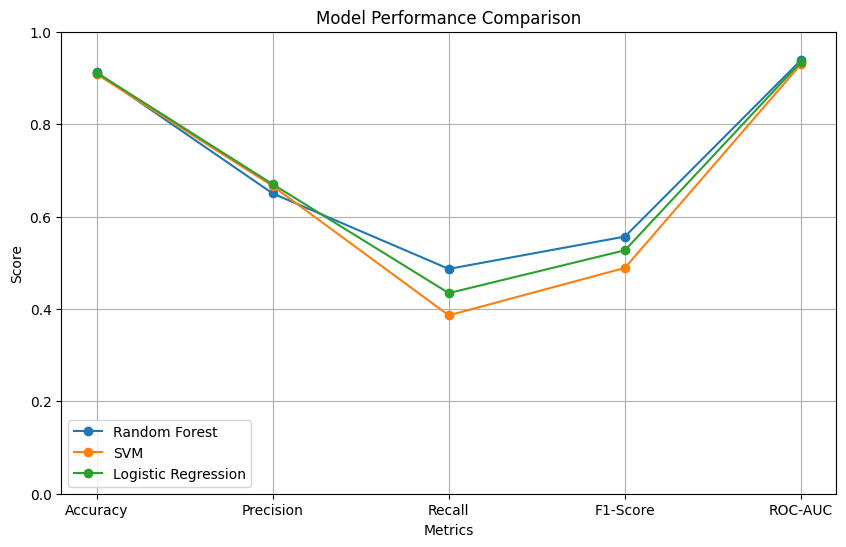

In [117]:
#Line GRAPH RESULT
results_T = results.T

# Plot line graph
plt.figure(figsize=(10,6))
for model in results_T.columns:
    plt.plot(results_T.index, results_T[model], marker='o', label=model)

plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

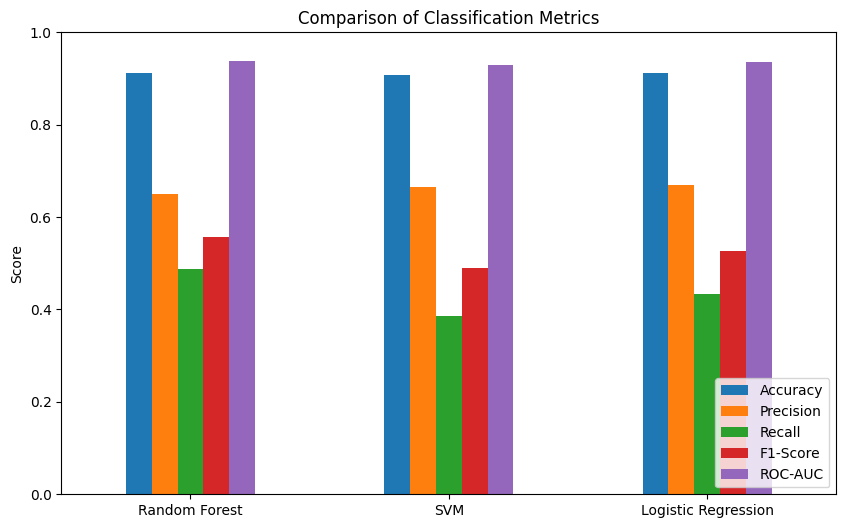

In [118]:
results.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Classification Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()